## Properties of the Model (Basis is Changed)


1.   **Half-filing** : Each unit cell has only one electron of one type of spin. As we are ignoring the spin in this case, then we consider one electron in each unit cell where there is two atom or sites.

2.   **Basis** : as basis we can take byte strings.

3. **N** : total number of sites

4. **N//2** : number of electrons

5. **N//2** : number of unit cells



### Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import itertools

### Functions

In [21]:
def basis_generator(N): # Checked OK

  basis = []

  for combination_indices in itertools.combinations(range(N), N // 2):
    state = [0] * N
    for index in combination_indices:
      state[index] = 1
    basis.append(state)
  
  return np.array(basis, dtype=np.float64)


def hamiltonian_generator(N, basis, v, w):
  d = len(basis)
  H = np.zeros((d, d))

  for i in range(d):
    for j in range(d):
      H[j][i] = np.dot(H__ket(basis[i], N, v, w), basis[j])

  return H


def H__ket(ket, N, v, w):
  res = np.zeros((N), dtype=np.float64)
  for i in range(N):
    if i % 2 == 0 and i - 1 > 0:
      if ket[i - 1] == 1:
        res[i] += w
      if ket[i + 1] == 1:
        res[i] += v
    elif i % 2 == 1 and i + 1 < N:
      if ket[i - 1] == 1:
        res[i] += v
      if ket[i + 1] == 1:
        res[i] += w
    elif i == 0 and ket[i + 1] == 1:
      res[i] += v
    elif i == N - 1 and ket[i - 1] == 1:
      res[i] += v
  return res

In [ ]:
print(len(basis_generator(4)))
print(basis_generator(4))

In [ ]:
# k = 0
N = 4
v = 1
w = 2

basis = basis_generator(N)
ket = basis[k]

# print(len(basis))
# print(basis)

# H_ket = H__ket(ket, N, v, w)

# print(ket)
# print(H_ket)
# for k in range(len(basis)):
#     ket = basis[k]
#     H_ket = H__ket(ket, N, v, w)
#     print(f"{ket} ---->> {H_ket}")

H = hamiltonian_generator(N, basis, v, w)
print(H)
print(sp.linalg.ishermitian(H))

### Calculation

Iteration Number: 0
Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20
Iteration Number: 21
Iteration Number: 22
Iteration Number: 23
Iteration Number: 24
Iteration Number: 25
Iteration Number: 26
Iteration Number: 27
Iteration Number: 28
Iteration Number: 29
Iteration Number: 30
Iteration Number: 31
Iteration Number: 32
Iteration Number: 33
Iteration Number: 34
Iteration Number: 35
Iteration Number: 36
Iteration Number: 37
Iteration Number: 38
Iteration Number: 39
Iteration Number: 40
Iteration Number: 41
Iteration Number: 42
Iteration Number: 43
Iteration Number: 44
Iteration Number: 45
Iteration Number: 46
Iteration Number: 47
It

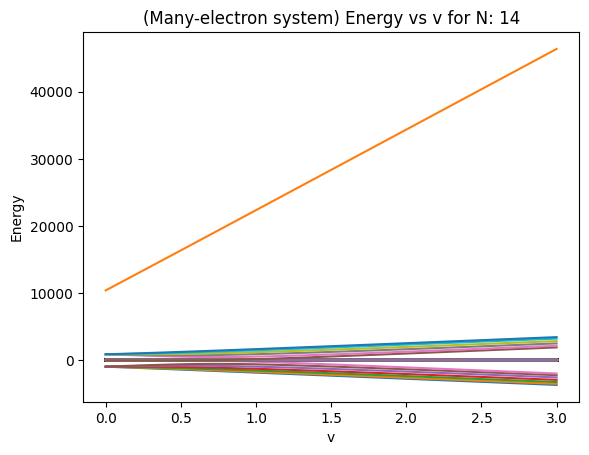

In [30]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 14
basis = basis_generator(N)
E_arr = np.zeros((steps, len(basis)), dtype=np.float64)
E_vec_arr = np.zeros((steps, len(basis), len(basis)), dtype=np.float64)

for i, v in enumerate(v_arr):
  print(f"Iteration Number: {i}")
  H = hamiltonian_generator(N, basis, v, w)

  e_val, e_vec = np.linalg.eigh(H)

  idx = e_val.argsort()
  E_arr[i] = e_val[idx]
  E_vec_arr[i] = e_vec[:, idx]

E_arr_T = E_arr.transpose()

e_leb = 0
for e_arr in E_arr_T:
  e_leb += 1
  plt.plot(v_arr,e_arr)


plt.title(f"(Many-electron system) Energy vs v for N: {N}")
plt.xlabel("v")
plt.ylabel("Energy")
plt.show()

In [31]:
import h5py

In [32]:
data_file = h5py.File('SSH_model_v3.h5', 'a')

In [37]:
print(v_arr)
print("------------")
print(E_arr)
print("------------")
print(E_vec_arr)

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99 1.02 1.05 1.08 1.11 1.14 1.17 1.2  1.23
 1.26 1.29 1.32 1.35 1.38 1.41 1.44 1.47 1.5  1.53 1.56 1.59 1.62 1.65
 1.68 1.71 1.74 1.77 1.8  1.83 1.86 1.89 1.92 1.95 1.98 2.01 2.04 2.07
 2.1  2.13 2.16 2.19 2.22 2.25 2.28 2.31 2.34 2.37 2.4  2.43 2.46 2.49
 2.52 2.55 2.58 2.61 2.64 2.67 2.7  2.73 2.76 2.79 2.82 2.85 2.88 2.91
 2.94 2.97 3.  ]
------------
[[ -924.          -924.          -924.         ...   924.
    924.         10428.        ]
 [ -949.07215085  -941.61156804  -930.67195553 ...   932.0772315
    941.6022618  10783.89519575]
 [ -974.32630792  -959.84724759  -938.33235    ...   941.08453343
    959.81301668 11140.08073588]
 ...
 [-3584.22961857 -3420.98778039 -3161.12809709 ...  3195.13244475
   3419.76964691 45640.95177914]
 [-3611.83491147 -3448.27911378 -3188.02465819 ...  3222.0907499
   3447.06566699

In [36]:
group = data_file.create_group("run-1")
group.create_dataset("v_arr", data=v_arr)
group.create_dataset("E_arr", data=E_arr)
group.create_dataset("E_vec_arr", data=E_vec_arr)

<HDF5 dataset "E_vec_arr": shape (101, 3432, 3432), type "<f8">

In [39]:
data_file.close()